# ლექცია #8

## კოდების გაშვებისთვის საჭირო ბიბლიოთეკების იმპორტები

ამ ნოუთბუქის გაშვებამდე არ დაგავიწყდეთ საჭირო დამოკიდებულებების (dependencies) დაინსტალირება, რომლებიც მოცემულია `requirements.txt` ფაილში. მარტივად, ტერმინალიდან გაუშვით:

```bash
pip install -r requirements.txt
```

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## ბაიესის თეორემა

ალბათობის თეორიასა და სტატისტიკაში ბაიესის თეორემა აღწერს მოვლენის ალბათობას, რომელიც დაფუძნებულია იმ პირობების წინასწარ ცოდნაზე, რომელიც შეიძლება დაკავშირებული იყოს მოვლენასთან. 

თუ $A$ მოვლენის მოხდენის ალბათობა $P(A)$ გავლენას ახდენს $B$ მოვლენის მოხდენაზე, მაშინ ვამბობთ, რომ $A$ და $B$ არის დამოკიდებული (dependent) მოვლენები. შესაბამისად, თუ მათ ზეგავლენა არ აქვთ ერთმანეთის მოხდენის ალბათობაზე - ეს ორი მოვლენა დამოუკიდებელია (independent).

ბაიესის თეორემის მათემატიკური ჩანაწერია:

$$P(A \vert B)={\frac {P(B \vert A) \times P(A)}{P(B)}}$$

სადაც $A$ და $B$ არიან მოვლენები და $P(B) \neq 0$.

* $P(A \vert B)$ არის პირობითი ალბათობა: $A$ მოვლენის მოხდენის ალბათობა იმის გათვალისწინებით, რომ $B$ მოვლენა მოხდა ([posterior probability](https://en.wikipedia.org/wiki/Posterior_probability) of $A$ given $B$).
* $P(B \vert A)$ არის პირობითი ალბათობა: $B$ მოვლენის მოხდენის ალბათობა იმის გათვალისწინებით, რომ $A$ მოვლენა მოხდა.
* $P(A)$ და $P(B)$ არიან $A$ და $B$ მოვლენის მოხდენის ალბათობები პირობების გარეშე. მათ ასევე მოვიხსენიებთ, როგორც [prior probability](https://en.wikipedia.org/wiki/Prior_probability) და [marginal probability](https://en.wikipedia.org/wiki/Marginal_probability).

პირობითი ალბათობის მიხედვით ფორმულა შესაძლებელია ასეც ჩაიწეროს:

$$P(A \vert B)={\frac {P(A \cap B)}{P(B)}},{\text{ თუ }}P(B) \neq 0$$

სადაც $P(A \cap B)$ არის ალბათობა იმისა, რომ ორივე მოვლენა მოხდება.

მსგავსად,

$$P(B \vert A)={\frac {P(A \cap B)}{P(A)}},{\text{ თუ }}P(A) \neq 0$$

საიდანაც შეგვიძლია $P(A \cap B)$ ჩავწეროთ, როგორც $P(B \vert A) \times P(A)$ და თუ ამ ჩანაწერს გამოვიყენებთ $P(A \vert B)$-ს გამოსათვლელად, ბაიესის ფორმულას მივიღებთ:

$$P(A \vert B)={\frac {P(B \vert A) \times P(A)}{P(B)}},{\text{ თუ }}P(B) \neq 0$$

**ბაიესის თეორიის ვიზუალური დამტკიცება**:

![Bayes Theorem Visual Proof](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Bayes_theorem_visual_proof.svg/768px-Bayes_theorem_visual_proof.svg.png)

დამატებითი მასალა:

* [3Blue1Brow-ის ვიდეო ბაიესის თეორემაზე](https://youtu.be/HZGCoVF3YvM)
* [Bayesian Inference-ის ვიზუალური მაგალითი](https://seeing-theory.brown.edu/bayesian-inference/index.html)

## Naive Bayes Classification

`scikit-learn`-ში Naive Bayes-ის ცალკე [მოდული](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) არსებობს, სადაც supervised learning-ისთვის რამდენიმე კლასი არის აღწერილი იმისდა მიხედვით თუ რა ტიპის მონაცემებზე გვინდა მოდელის გამოყენება. მაგალითად, თუ ბინარული მონაცემები გვაქვს, მაშინ გამოვიყენებთ [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)-ს. უფრო მეტი ინფორმაციაა მოცემული [User Guide](https://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes)-ში.

სიმარტივისთვის გამოვიყენოთ `scikit-learn`-ში არსებული ირისის "სათამაშო" მონაცემები, რომელიც შედგება 150 ჩანაწერისგან. მონაცემები შეიცავს 4 მახასიათებელს: სეპალის სიგრძე და სიგანე, ფურცლის სიგრძე და სიგანე. ეტიკეტს წარმოადგენს ირისის სახეობა შემდეგი 3 სახეობიდან: Setosa, Versicolor, Virginica.

![Iris](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [2]:
iris_data = load_iris()

In [3]:
iris_data.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

რადგანაც მონაცემები ცოტაა, ამიტომ მონაცემების 17% ავიღოთ ტესტირებისთვის:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data,
    iris_data.target,
    test_size=0.17,
    random_state=1,
    stratify=iris_data.target,
)

In [7]:
print("სატრენინგო მონაცემების ზომა:", X_train.shape, y_train.shape)
print("სატესტო მონაცემების ზომა:", X_test.shape, y_test.shape)

სატრენინგო მონაცემების ზომა: (124, 4) (124,)
სატესტო მონაცემების ზომა: (26, 4) (26,)


In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

`class_prior_` მეთოდით შეგვიძლია თითოეული კლასის, ეტიკეტის, prior ალბათობების ნახვა:

In [9]:
gnb.class_prior_

array([0.33870968, 0.33064516, 0.33064516])

ანუ Setosa-ს მოსვლის ალბათობა სატრენინგო მონაცემებში არის 0.338, Versicolor-ის 0.33 და Virginica-ს 0.33.

In [10]:
gnb.class_count_

array([42., 41., 41.])

In [11]:
gnb.class_count_[0] / gnb.class_count_.sum()

0.3387096774193548

In [12]:
gnb.class_count_[1] / gnb.class_count_.sum()

0.33064516129032256

In [13]:
train_preds = gnb.predict(X_train)
test_preds = gnb.predict(X_test)

In [14]:
print(
    f"აკურატულობა სატრენინგო მონაცემებზე: {accuracy_score(y_train, train_preds) * 100:.2f}%"
)
print(
    f"აკურატულობა სატესტო მონაცემებზე: {accuracy_score(y_test, test_preds) * 100:.2f}%"
)

აკურატულობა სატრენინგო მონაცემებზე: 95.16%
აკურატულობა სატესტო მონაცემებზე: 96.15%


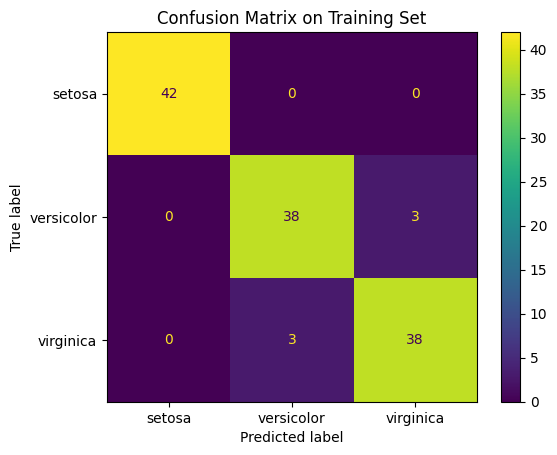

In [15]:
train_cm = confusion_matrix(y_train, train_preds)
train_cm_disp = ConfusionMatrixDisplay(
    confusion_matrix=train_cm, display_labels=iris_data.target_names
).plot()
plt.title("Confusion Matrix on Training Set")
plt.show()

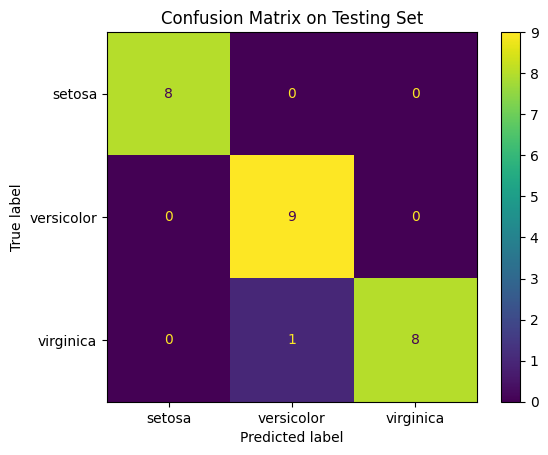

In [16]:
test_cm = confusion_matrix(y_test, test_preds)
test_cm_disp = ConfusionMatrixDisplay(
    confusion_matrix=test_cm, display_labels=iris_data.target_names
).plot()
plt.title("Confusion Matrix on Testing Set")
plt.show()